<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/CreditCard/creditcarddefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#import 
import numpy as np
import pandas as pd 
from google.colab import files 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc
%matplotlib inline

In [ ]:
files.upload()

In [42]:
data = pd.read_csv('ccd.csv')
data = data.drop(columns=['ID'])
data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


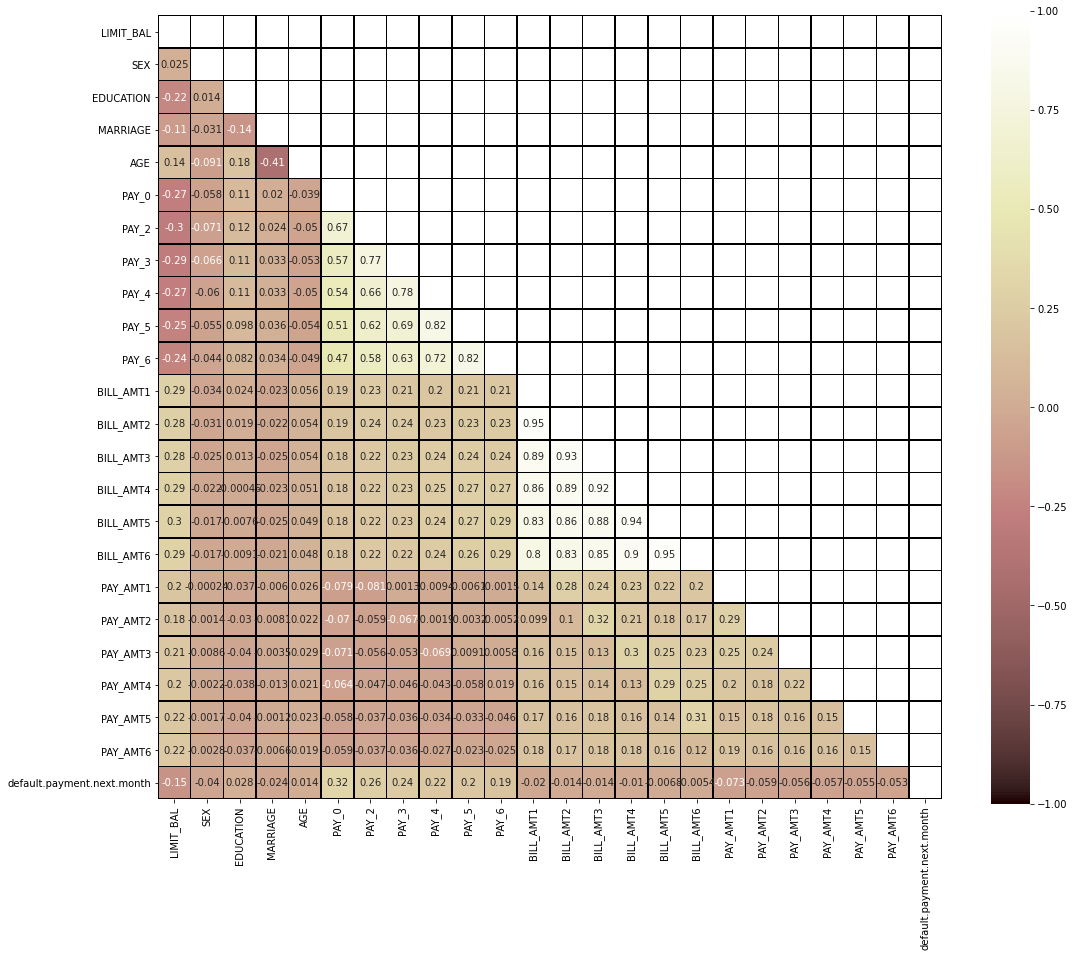

In [43]:
#visualize correlations 
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(16,16))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.pink,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [44]:
#manually scaling 
data['SEX'] = LE().fit_transform(data['SEX'])
data['MARRIAGE'] = LE().fit_transform(data['MARRIAGE'])
data['EDUCATION'] = LE().fit_transform(data['EDUCATION'])
for col in data:
  data[col] = (data[col]-data[col].min())/(data[col].max() - data[col].min())
data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


In [46]:
print(data['SEX'].value_counts())
print(data['MARRIAGE'].value_counts())
print(data['EDUCATION'].value_counts())
Y = data['default.payment.next.month']
data = data.drop(columns=['default.payment.next.month'])

1.0    18112
0.0    11888
Name: SEX, dtype: int64
0.666667    15964
0.333333    13659
1.000000      323
0.000000       54
Name: MARRIAGE, dtype: int64
0.333333    14030
0.166667    10585
0.500000     4917
0.833333      280
0.666667      123
1.000000       51
0.000000       14
Name: EDUCATION, dtype: int64


In [48]:
trainX,testX,trainY,testY = tts(data.values,Y.values,test_size=0.2,random_state=42)

In [49]:
trainX.shape

(24000, 23)

In [67]:
#create architecture
arch = seq()
arch.add(Dense(units = 24, input_shape= (23,), activation = 'relu')) 
arch.add(Dense(units = 64, activation = 'relu'))
arch.add(Dense(units = 128, activation = 'relu')) 
arch.add(Dense(units = 512, activation = 'relu')) 
arch.add(Dense(units = 256, activation = 'relu')) 
arch.add(Dense(units = 256, activation = 'relu')) 
arch.add(Dense(units = 64, activation = 'relu'))
arch.add(Dense(units = 24, activation = 'relu')) 
arch.add(Dense(units = 2, activation = 'softmax')) 
arch.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [69]:
#other models 
svc = SVC(gamma='auto')
svc.fit(trainX,trainY)

rfc = RFC(criterion='gini', n_estimators=100,verbose=False)
rfc.fit(trainX,trainY)

arch.fit(trainX, trainY, batch_size= 64, epochs = 12, validation_split= 0.2, shuffle = True,verbose = 2)

Epoch 1/12
300/300 - 3s - loss: 0.4351 - accuracy: 0.8198 - val_loss: 0.4491 - val_accuracy: 0.8096
Epoch 2/12
300/300 - 2s - loss: 0.4335 - accuracy: 0.8209 - val_loss: 0.4437 - val_accuracy: 0.8087
Epoch 3/12
300/300 - 2s - loss: 0.4323 - accuracy: 0.8212 - val_loss: 0.4445 - val_accuracy: 0.8160
Epoch 4/12
300/300 - 2s - loss: 0.4338 - accuracy: 0.8205 - val_loss: 0.4494 - val_accuracy: 0.8127
Epoch 5/12
300/300 - 2s - loss: 0.4310 - accuracy: 0.8219 - val_loss: 0.4480 - val_accuracy: 0.8135
Epoch 6/12
300/300 - 2s - loss: 0.4278 - accuracy: 0.8240 - val_loss: 0.4463 - val_accuracy: 0.8100
Epoch 7/12
300/300 - 2s - loss: 0.4277 - accuracy: 0.8227 - val_loss: 0.4430 - val_accuracy: 0.8158
Epoch 8/12
300/300 - 2s - loss: 0.4275 - accuracy: 0.8239 - val_loss: 0.4493 - val_accuracy: 0.8142
Epoch 9/12
300/300 - 2s - loss: 0.4271 - accuracy: 0.8243 - val_loss: 0.4415 - val_accuracy: 0.8158
Epoch 10/12
300/300 - 2s - loss: 0.4268 - accuracy: 0.8242 - val_loss: 0.4468 - val_accuracy: 0.8133

In [70]:
nnp = arch.predict(testX)
rfcp = rfc.predict(testX)
svcp = svc.predict(testX)

In [77]:
nnf = nnp.argmax(axis=1)
print("Neural Network accuracy: ", acc(nnf,testY)*100,'%')
print("Support Vector Classifier accuracy: ", acc(svcp,testY)*100,'%')
print("Random Forest Classifier accuracy: ", acc(rfcp,testY)*100,'%')

Neural Network accuracy:  81.58333333333333 %
Support Vector Classifier accuracy:  78.8 %
Random Forest Classifier accuracy:  81.45 %
